In [1]:
# Import library
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt
import zipfile

from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Unzip file
dataset_zip = 'travel-insurance-data.zip'
with zipfile.ZipFile(dataset_zip, 'r') as zip:
  zip.extractall('/content')

In [3]:
df = pd.read_csv('/content/TravelInsurancePrediction.csv')
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [5]:
# Menghapus kolom 'Unnamed' karena tidak dibutuhkan
df_new = df.drop(["Unnamed: 0"], axis=1)

# Mangubah kolom 'Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad' menjadi nilai 0 dan 1
df_new['GovernmentSector'] = df['Employment Type'].map({'Private Sector/Self Employed': 0, 'Government Sector':1})
df_new['GraduateOrNot'] = df['GraduateOrNot'].map({'Yes':1, 'No':0})
df_new['FrequentFlyer'] = df['FrequentFlyer'].map({'Yes':1, 'No':0})
df_new['EverTravelledAbroad'] = df['EverTravelledAbroad'].map({'Yes':1, 'No':0})

# Menghapus kolom Employment Type yang sudah diganti GovernmentSector
df_new.drop(["Employment Type"], axis=1, inplace=True)

df_new.head()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,GovernmentSector
0,31,1,400000,6,1,0,0,0,1
1,31,1,1250000,7,0,0,0,0,0
2,34,1,500000,4,1,0,0,1,0
3,28,1,700000,3,1,0,0,0,0
4,28,1,700000,8,1,1,0,0,0


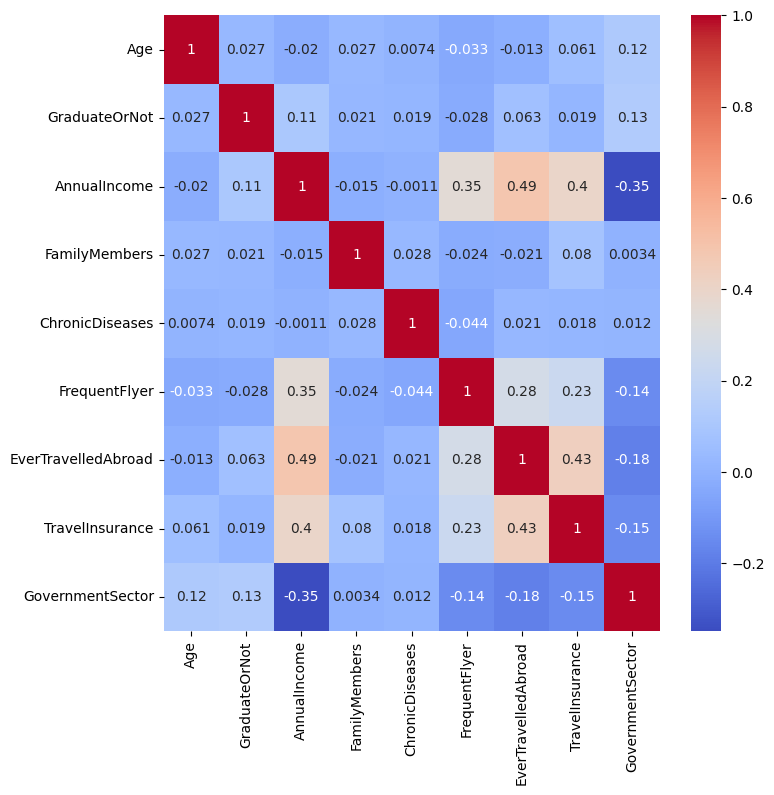

In [6]:
# Visualisasi Korelasi
plt.figure(figsize=(8,8))
_ = sns.heatmap(df_new.corr(), cmap='coolwarm', annot=True)

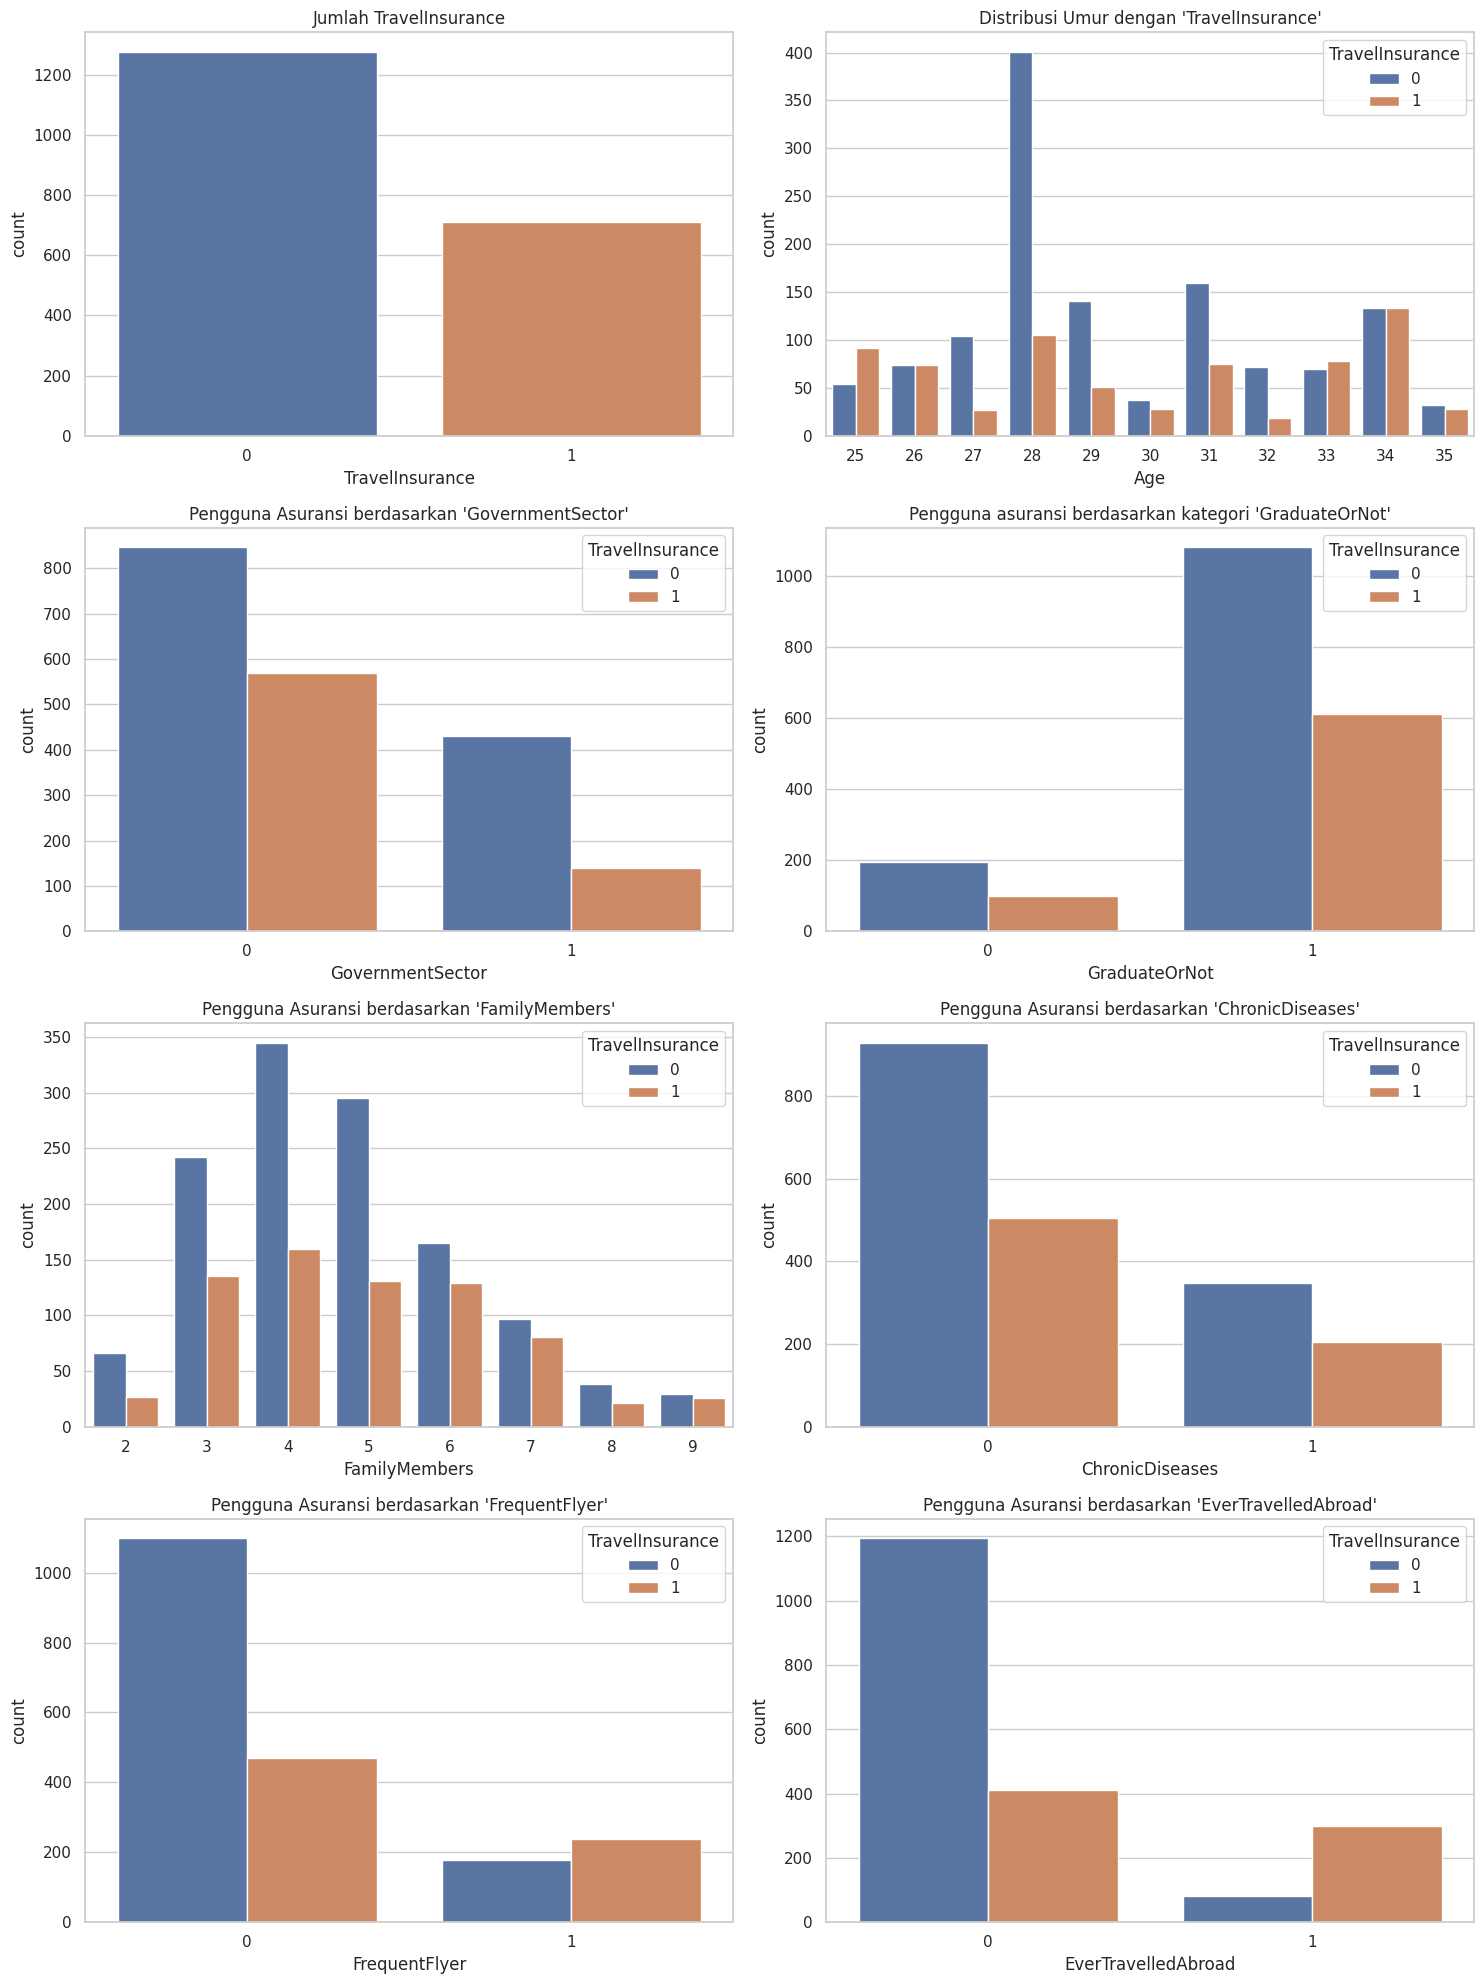

In [7]:
# Menganalisis data menggunakan visualisasi

# Set style for seaborn
sns.set(style="whitegrid")

# # Membuat subplot
plt.figure(figsize=(15, 20))

# Subplot 1: Jumlah TravelInsurance
plt.subplot(4, 2, 1)
sns.countplot(x='TravelInsurance', data=df_new)
plt.title('Jumlah TravelInsurance')

# Distribusi umur
plt.subplot(4, 2, 2)
sns.countplot(x='Age', data=df_new, hue='TravelInsurance')
plt.title("Distribusi Umur dengan 'TravelInsurance'")

# Pengguna Asuransi berdasarkan kategori GovernmentSector
plt.subplot(4, 2, 3)
sns.countplot(x='GovernmentSector', hue='TravelInsurance', data=df_new)
plt.title("Pengguna Asuransi berdasarkan 'GovernmentSector'")

# Pengguna asuransi berdasarkan kategori 'GraduateOrNot'
plt.subplot(4, 2, 4)
sns.countplot(x='GraduateOrNot', data=df_new, hue='TravelInsurance')
plt.title("Pengguna asuransi berdasarkan kategori 'GraduateOrNot'")

# Pengguna Asuransi berdasarkan 'FamilyMembers'
plt.subplot(4, 2, 5)
sns.countplot(x='FamilyMembers', hue='TravelInsurance', data=df_new)
plt.title("Pengguna Asuransi berdasarkan 'FamilyMembers'")

# Pengguna Asuransi berdasarkan 'ChronicDiseases'
plt.subplot(4, 2, 6)
sns.countplot(x='ChronicDiseases', data=df_new, hue='TravelInsurance')
plt.title("Pengguna Asuransi berdasarkan 'ChronicDiseases'")

# Pengguna Asuransi berdasarkan kategori FrequentFlyer
plt.subplot(4, 2, 7)
sns.countplot(x='FrequentFlyer', data=df_new, hue='TravelInsurance')
plt.title("Pengguna Asuransi berdasarkan 'FrequentFlyer'")

# Pengguna Asuransi berdasarkan kategori EverTravelledAbroad
plt.subplot(4, 2, 8)
sns.countplot(x='EverTravelledAbroad', hue='TravelInsurance', data=df_new)
plt.title("Pengguna Asuransi berdasarkan 'EverTravelledAbroad'")

# Adjust layout
plt.tight_layout()

plt.show()

Hasil dari Explanatory Data Analysis:

1. Pada distribusi umur dalam penggunaan TravelInsurance, bahwa umur dibawah 33 tahun cenderung tidak menggunakan Asuransi saat bepergian
2. Pelanggan yang telah melakukan perjalan lebih dari 2 kali, cenderung menggunakan Asuransi
3. Pelanggan yang sering bepergian keluar negeri juga menggunakan Asuransi Travel

## Data Pre-processing

1. **Resampling dataset** untuk mencapai keseimbangan jumlah data. Resampling diperlukan untuk mengatasi bias dalam prediksi akibat ketidakseimbangan kuantitas data.
2. **Membagi dataset** menjadi dua bagian, yaitu data latih sebesar 80% dan data uji sebesar 20%. Pembagian dataset penting untuk menguji performa model terlatih pada data baru. Dalam kasus dataset ini, rasio 80:20 dianggap optimal karena jumlah datanya masih dalam skala ribuan (1987 baris).
3. **Normalisasi** dengan mengubah skala data sehingga memiliki distribusi yang relatif seragam atau mendekati distribusi normal. Langkah standarisasi bertujuan untuk membuat fitur numerik memiliki skala yang seragam, memudahkan proses pelatihan model.

### 1. Resample Dataset

In [8]:
# Membagi feature dan label
label = 'TravelInsurance'

features = ['Age', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers',
            'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad',
            'GovernmentSector']

print('Label Coloumn:', label)
print('Features Coloumn:', features)

Label Coloumn: TravelInsurance
Features Coloumn: ['Age', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'GovernmentSector']


In [9]:
# Cek jumlah data pada kolom label 'TravelInsurance'
pd.value_counts(df_new['TravelInsurance'])

0    1277
1     710
Name: TravelInsurance, dtype: int64

In [10]:
# Resampling untuk menangani ketidakseimbangan data pada class

yes = df_new[df_new['TravelInsurance']==1]
no = df_new[df_new['TravelInsurance']==0]

# Melakukan Data Balancing pada label == 1
df_resampled = resample(yes, replace = True, n_samples=1277)

# Menggabungkan data resample kedalam dataFrame
df_balanced = pd.concat([no, df_resampled])

pd.value_counts(df_balanced['TravelInsurance'])

0    1277
1    1277
Name: TravelInsurance, dtype: int64

### 2. Membagi Dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced[features], df_balanced[label], test_size=0.2, random_state=21, shuffle=True, stratify=df_balanced[label])

print(y_train.groupby(y_train).count())
print(y_test.groupby(y_test).count())

TravelInsurance
0    1022
1    1021
Name: TravelInsurance, dtype: int64
TravelInsurance
0    255
1    256
Name: TravelInsurance, dtype: int64


### 3. Normalisasi menggunakan Min-Max Scaler

In [12]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Mengembangkan model

Algoritma machine learning yang diterapkan untuk menangani permasalahan dalam proyek ini mencakup K-Nearest Neighbors (KNN) dan Gradient Boosting.

1. **K-Nearest Neighbors (KNN)**

    Algoritma KNN yang diimplementasikan menggunakan library scikit-learn memilih nilai hyperparameter k=8, hasil dari eksperimen yang melibatkan beberapa nilai k lainnya dalam rentang 1-10. Pemilihan nilai k=8 didasarkan pada evaluasi performa, di mana nilai ini memberikan hasil terbaik. Model KNN dilatih dengan menggunakan data yang telah melalui tahap *pre-processing*.

2. **Gradient Boosting**

    Penerapan model Gradient Boosting juga melibatkan penggunaan library scikit-learn, khususnya GradientBoostingClassifier. Model ini dilatih dengan data yang telah melewati proses pre-processing untuk memastikan konsistensi dan kualitas data yang masuk ke dalam model.

### 1. Pegembangan menggunakan KNN Model

In [13]:
knn = KNeighborsClassifier()

# Melatih model KNN
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
# Menyimpan score hasil akurasi pada baseline model
score_knn = pd.DataFrame(columns=['Latih', 'Test'], index=['KNN'])
score_knn.loc['KNN', 'Latih'] = knn.score(X_train, y_train)
score_knn.loc['KNN', 'Test'] = knn.score(X_test, y_test)

score_knn

,Latih,Test
KNN,0.845815,0.782779


#### Melakukan Improvement pada KNN model

In [15]:
# Hyperparameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'p': [1, 2],
              'weights': ["uniform","distance"],
              'algorithm':["ball_tree", "kd_tree", "brute"],
              }

# Pencarian parameter terbaik dengan GridSearchCV
knn_improved = GridSearchCV(knn,
                            param_grid,
                            cv = 5,
                            verbose = 1,
                            n_jobs = -1,
                            scoring='accuracy',
                            )
knn_improved.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [16]:
# Menggunakan parameter terbaik ketika improvement KNN model
knn_improved = KNeighborsClassifier(**knn_improved.best_params_)

# Melatih KNN model dengan parameter terbaik
knn_improved.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7, p=1,
                     weights='distance')

In [17]:
# Membandingkan Hasil akurasi KNN model sebelum improve dan setelah mendapat parameter terbaik
score = pd.DataFrame(columns=['Latih', 'Test'], index=['KNN', 'KNN Improved'])

model_dict = {'KNN': knn,
              'KNN Improved': knn_improved}

for name, model in model_dict.items():
  score.loc[name, 'Latih'] = model.score(X_train, y_train)
  score.loc[name, 'Test'] = model.score(X_test, y_test)

score

,Latih,Test
KNN,0.845815,0.782779
KNN Improved,0.92511,0.81409


### 2. Pegembangan menggunakan Gradient Boosting Model

In [18]:
gradient_boosting = GradientBoostingClassifier()

# Melatih Gradient Boosting Model
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier()

In [19]:
# Menyimpan score hasil akurasi pada baseline model
score_gradient_boosting = pd.DataFrame(columns=['latih', 'uji'], index=['Gradient Boosting'])
score_gradient_boosting.loc['Gradient Boosting', 'latih'] = gradient_boosting.score(X_train, y_train)
score_gradient_boosting.loc['Gradient Boosting', 'uji'] = gradient_boosting.score(X_test, y_test)

score_gradient_boosting

,latih,uji
Gradient Boosting,0.814488,0.786693


In [20]:
# Hyperparameter grid
param_grid = {'n_estimators': [10, 50, 100, 200, 500, 750, 1000],
              'max_depth': [3, 5, 10],
              'min_samples_leaf': [np.random.randint(1,10)],
              'max_features': [None, 'sqrt', 'log2']
              }

# Pencarian parameter terbaik dengan GridSearchCV
gradient_boosting_improved = GridSearchCV(gradient_boosting,
                            param_grid,
                            cv = 5,
                            verbose = 1,
                            n_jobs = -1,
                            scoring='roc_auc',
                            )
gradient_boosting_improved.fit(X_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1],
                         'n_estimators': [10, 50, 100, 200, 500, 750, 1000]},
             scoring='roc_auc', verbose=1)

In [21]:
# Pilih parameter terbaik untuk Gradient Boosting
gb_improved = GradientBoostingClassifier(**gradient_boosting_improved.best_params_)

# Latih model final
gb_improved.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, max_features='log2')

In [22]:
# Membandingkan Hasil akurasi Gradient Boosting model sebelum improve dan setelah mendapat parameter terbaik
score = pd.DataFrame(columns=['Latih', 'Test'], index=['Gradient Boosting', 'Gradient Boosting Improved'])

model_dict = {'Gradient Boosting': gradient_boosting,
              'Gradient Boosting Improved': gb_improved}

for name, model in model_dict.items():
  score.loc[name, 'Latih'] = model.score(X_train, y_train)
  score.loc[name, 'Test'] = model.score(X_test, y_test)

score

,Latih,Test
Gradient Boosting,0.814488,0.786693
Gradient Boosting Improved,0.92511,0.851272


## Model Evaluation

### 1. Confusion Matrix

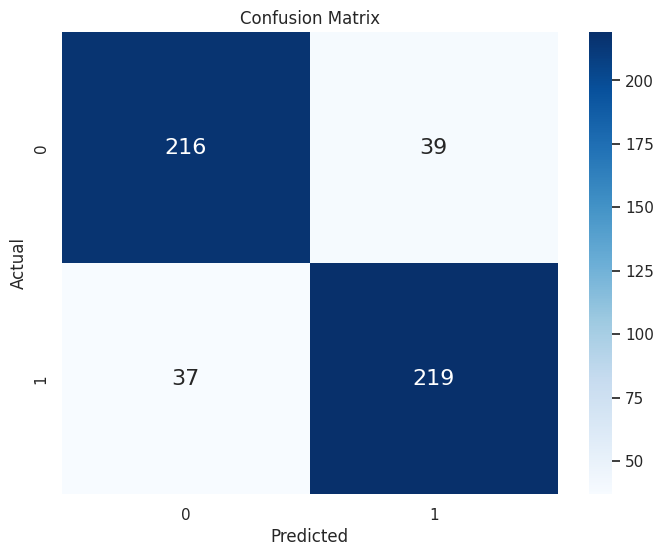

In [23]:
# Menggunakan model yang sudah diprediksi
y_pred = gb_improved.predict(X_test)

# Menghasilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 3. Accuracy, Precision, recall, f1-score

In [24]:
print('Akurasi: ', round(accuracy_score(y_pred, y_test), 3) * 100, '%')
print('Presisi: ', round(precision_score(y_pred, y_test), 3)* 100, '%')
print('Recall: ', round(recall_score(y_pred, y_test), 2)* 100, '%')
print('F1-score: ', round(f1_score(y_pred, y_test), 3)* 100, '%')

Akurasi:  85.1 %
Presisi:  85.5 %
Recall:  85.0 %
F1-score:  85.2 %
